In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Packages

In [59]:
import pandas as pd
from transformers import pipeline, AutoTokenizer
from tqdm import tqdm
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Dataset

In [60]:
songs = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset/output/songs.csv", sep=";")
tqdm.pandas()

### Hugging Faces Model

In [61]:
sentiment_model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

sentiment_pipe = pipeline(
    "text-classification",
    model=sentiment_model_name
)

sentimento_tokenizer = AutoTokenizer.from_pretrained(sentiment_model_name)

Device set to use cuda:0


In [62]:
toxicity_model_name = "unitary/toxic-bert"

toxicity_pipe = pipeline("text-classification", model=toxicity_model_name)

toxicity_tokenizer = AutoTokenizer.from_pretrained(toxicity_model_name)

Device set to use cuda:0


### Filtering Tokens

In [63]:
songs["sentiment_tokens"] = songs["transformed_without_tags"].apply(lambda x: len(sentimento_tokenizer.tokenize(x)))

songs = songs[songs["sentiment_tokens"] <= 500].copy()

songs["toxicity_tokens"] = songs["transformed_without_tags"].apply(lambda x: len(toxicity_tokenizer.tokenize(x)))

songs = songs[songs["toxicity_tokens"] <= 500].copy()

Token indices sequence length is longer than the specified maximum sequence length for this model (562 > 512). Running this sequence through the model will result in indexing errors


### Applying sentiment analysis

In [64]:
def get_top_label(result):
    return result[0]["label"]

def classify_toxicity(row):
    if isinstance(row, list) and len(row) > 0 and row[0]['score'] > 0.7:
        return "Toxic"
    return "Not Toxic"

In [65]:
songs["sentiment_result"] = songs["transformed_without_tags"].progress_apply(lambda x: sentiment_pipe(x))

songs["sentiment"] = songs["sentiment_result"].apply(get_top_label)

100%|██████████| 1868/1868 [00:37<00:00, 49.70it/s]


#### Counting Sentiment

<Axes: xlabel='sentiment'>

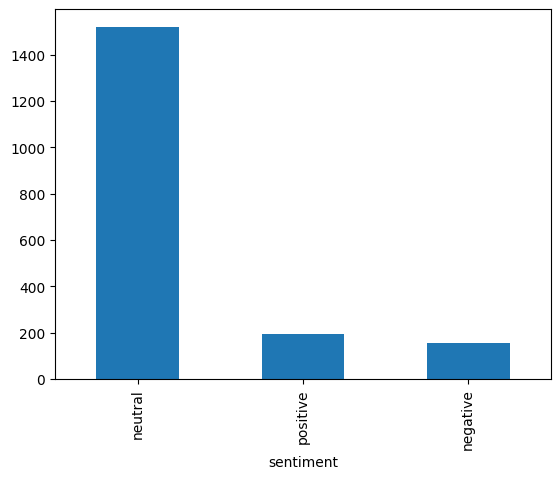

In [66]:
songs["sentiment"].value_counts().plot.bar()

#### Negative Sentiment vs Category

<Axes: ylabel='category'>

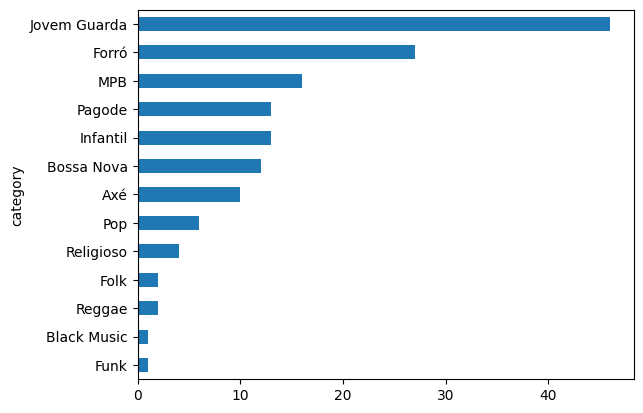

In [67]:
songs[songs["sentiment"] == "negative"]["category"].value_counts().sort_values(ascending=True).plot.barh()

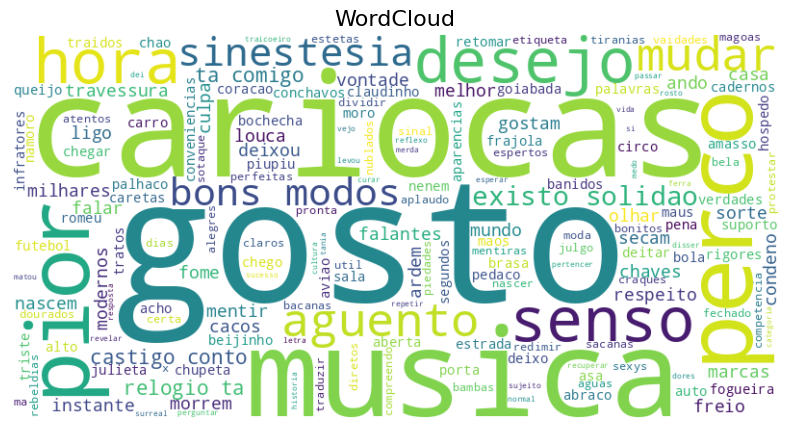

In [68]:
negative = songs[(songs["sentiment"] == "negative") & (songs["category"] == "Pop")]["transformed"]

text = " ".join(negative.astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud", fontsize=16)
plt.show()

In [69]:
songs[(songs["sentiment"] == "negative") & (songs["category"] == "Jovem Guarda")]["transformed_without_tags"].values[1]

'Uma vida tão vazia, sem amor, sem esperança, fez de mim uma descrente de viver, e durante as minhas férias eu pensei numa viagem, e assim os meus problemas esquecer... E no trem que eu viajei conheci um moço triste que a felicidade um dia esqueceu, me falou de sua vida, seus anseios, suas mágoas, ele era tão sozinho como eu....  Fatalidade! O amor surgir tão de repente, até mesmo quando trás uma esperança, é uma fatalidade,  Nosso modo de sentir nos unia a cada instante, e logo entre nos dois o amor nasceu, mas uma briga sem motivo destruiu nossa alegria fez com que eu voltase logo sem voçê  A cidade aonde eu moro procurei com esperança outro alguem que ocupasse seu lugar mas ninguem me compreende só voçê me entendia e por isso e que eu procuro por voçê fatalidade o amor surgir tão derrepente até mesmo quando traz uma esperança é uma fatalidade  Mas se resta um sentimento no seu coração amigo que eu tanto maguei quando parti eu lhe peço que esqueça nossa briga de um momento pois não v

#### Positive Sentiment vs Category

##### Count categories to positive sentiment

<Axes: ylabel='category'>

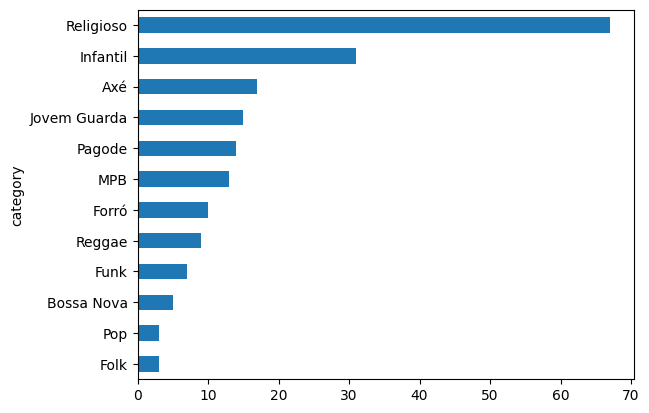

In [70]:
songs[songs["sentiment"] == "positive"]["category"].value_counts().sort_values(ascending=True).plot.barh()

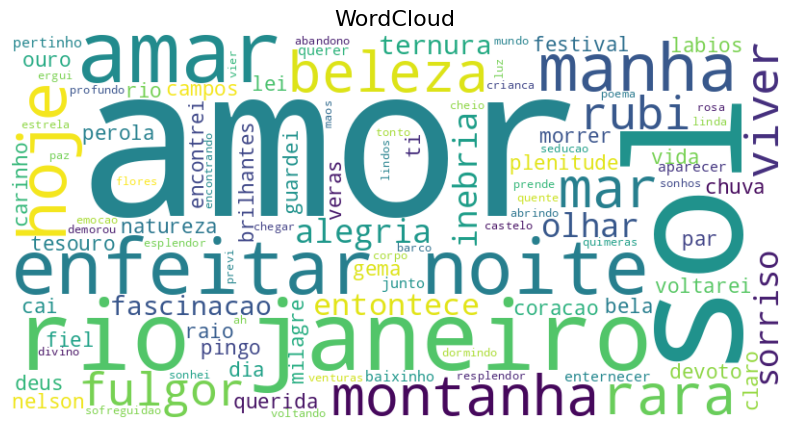

In [71]:
negative = songs[(songs["sentiment"] == "positive") & (songs["category"] == "Bossa Nova")]["transformed"]

text = " ".join(negative.astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud", fontsize=16)
plt.show()

### Applying toxicity analysis

In [72]:
songs["toxicity_result"] = songs["transformed_without_tags"].progress_apply(lambda x: toxicity_pipe(x))

songs["toxicity"] = songs["toxicity_result"].apply(classify_toxicity)

100%|██████████| 1868/1868 [00:33<00:00, 55.70it/s]


<Axes: ylabel='category'>

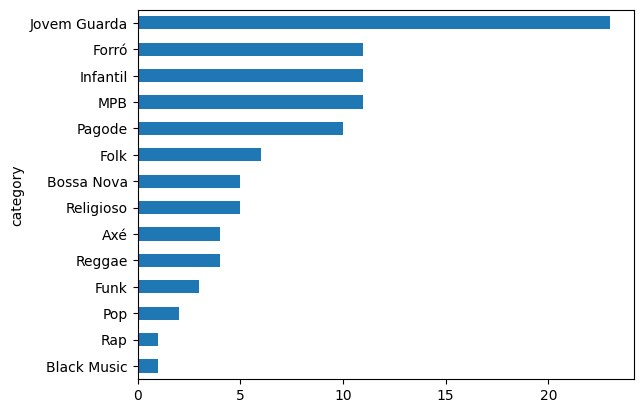

In [73]:
songs[songs["toxicity"] == "Toxic"]["category"].value_counts().sort_values(ascending=True).plot.barh()

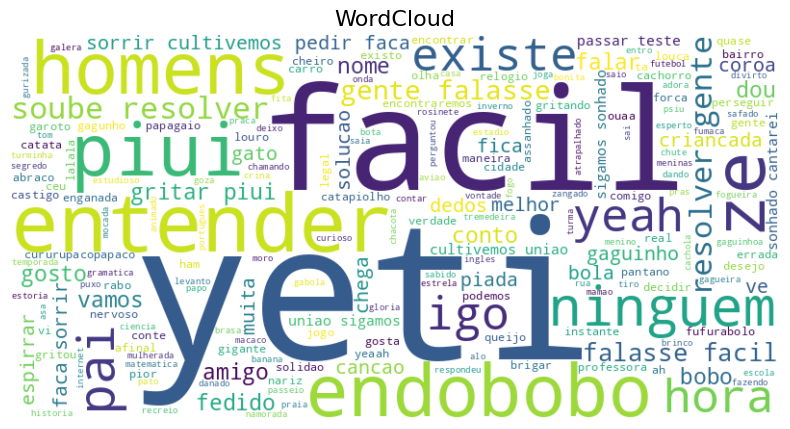

In [74]:
toxico = songs[(songs["toxicity"] == "Toxic") & (songs["category"] == "Infantil")]["transformed"]

text = " ".join(toxico.astype(str).values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud", fontsize=16)
plt.show()

In [75]:
songs[(songs["toxicity"] == "Toxic") & (songs["category"] == "Infantil")]["transformed_without_tags"].values[0]

'Fufurabolo catatá catapiolho Zé gagunho conte os dedos Vê se não fica nervoso  Zé gaguinho quando chega na escola Sua turma faz chacota A galera toda goza Lhe chamando de gabola Mas na hora do recreio A criançada joga bola Zé gaguinhoa dá um chute Bota a bola na cachola  Zé gaguinho é menino estudioso Na ciência ele é sabido Na história é o curioso Tudo ele sabe, na turminha ele é o bom Matemática, português Na gramática no inglês Ele nunca sai do tom  Mas quando vê a professora Já lhe dá uma tremedeira Fica todo atrapalhado Vai lhe dando uma gagueira  A professora perguntou O nome dos cinco dedos Zé gaguinho respondeu Isso aí não é segredo  Fufurabolo catatá catapiolho Zé gagunho conte os dedos Vê se não fica nervoso'